In [1]:
# 설치 버전 확인
import os
import pandas as pd
import geopandas as gpd
from glob import glob
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
from unicodedata import normalize
import os

print(os.getcwd())

# 맥북에서 문자열 음절단위 분리 방지
def change_nfc_all_dir(dirname):
    filenames = os.listdir(dirname)
    for filename in filenames:
        before_filename = os.path.join(dirname, filename)
        after_filename = normalize('NFC', before_filename)
        os.rename(before_filename, after_filename)
        
        if os.path.isdir(before_filename):    
            change_nfc_all_dir(before_filename)
            
change_nfc_all_dir(r'/Users/jeonjunhwi/문서/Projects') # <- 현재 Desktop 하위 폴더에 대해 모두 적용

import matplotlib.pyplot as plt
def matplotlib_plot_font():

    # plot에서 한글 폰트 깨지는 현상 해결!
    from matplotlib import font_manager, rc
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
    font = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family = font)
    
matplotlib_plot_font()

/Users/jeonjunhwi/문서/Projects/GNN_Covid


In [3]:
folders = glob('Data/행정구역별_위경도/**/**.shp', recursive=True)
metro = glob('**/**/*경기/**.shp') + glob('**/**/*서울/**.shp') + glob('**/**/*인천/**shp')
nonmetro_1 = glob('**/**/*경남/**.shp') + glob('**/**/*부산/**.shp') + glob('**/**/*경북/**.shp') + glob('**/**/*울산/**.shp') + glob('**/**/*대구/**.shp')
nonmetro_2 = glob('**/**/*전남/**.shp') + glob('**/**/*전북/**.shp') + glob('**/**/*광주/**.shp')
nonmetro_3 = glob('**/**/*세종/**.shp') + glob('**/**/*대전/**.shp') + glob('**/**/*충남/**.shp') + glob('**/**/*충북/**.shp')
nonmetro_4 = glob('**/**/*강원/**.shp')
nonmetro_5 = glob('**/**/*제주/**.shp')

tmp_df = pd.DataFrame(columns=['centroid', 'SGG_NM'])
diff_df = gpd.GeoDataFrame({})

# for i, files in enumerate(folders):
for i, files in enumerate(metro + nonmetro_1 + nonmetro_2 + nonmetro_3 + nonmetro_4 + nonmetro_5):
# for i, files in enumerate(nonmetro_3):

    # 지리 데이터 로드
    gg = gpd.read_file(files, encoding='cp949')
    gg = gg[['SGG_NM', 'geometry']]
    # 경기 구리시, 서울 중구 등으로 바꿈
    gg['SGG_NM'] = [files[33:35] + ' ' + y for y in gg['SGG_NM']]
    
    
    # if files[18:20] == '경남':
    #     print(gg[23])
    #     gg.drop(23, inplace=True)
    
    # 좌표계(Coordinate Refference System) 변경 -> 위도, 경도 기준으로 바뀜.
    lon_lat_gg = gg.to_crs(4326)
    
    if i == 0:
        lon_lat_gg_1 = lon_lat_gg
        lon_lat_gg_1['longitude'] = lon_lat_gg.centroid.x  
        lon_lat_gg_1['latitude'] = lon_lat_gg.centroid.y
        lon_lat_gg_1['centroid'] = lon_lat_gg.centroid
        
    else:
        lon_lat_gg['longitude'] = lon_lat_gg.centroid.x  
        lon_lat_gg['latitude'] = lon_lat_gg.centroid.y
        lon_lat_gg['centroid'] = lon_lat_gg.centroid

        lon_lat_gg_1 = lon_lat_gg_1.merge(lon_lat_gg, how='outer')

In [4]:

# 행정구역 명 통일
gdf_tmp = lon_lat_gg_1.copy()
remove_dict = {}
remove_list = []
######################
# for region in ['상당|청원|서원|흥덕']:
for region in ['성남시', '안산시', '수원시', '안양시', '일산|덕양', '수지|기흥|처인', '창원시', '포항시', '천안시', '세종', '전주시', '상당|청원|흥덕', '서원']:
    for i, idx in enumerate(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)].index):
        # print(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)])
        if i == 0:
            tmp = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
            ######################
            ### 서울 인천 경기 ###
            ######################
            if '수지' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경기 용인시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 용인시' 
            elif '일산' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경기 고양시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 고양시'  
            elif '성남' in region:   
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경기 ' + region
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
            elif '안산' in region:   
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경기 ' + region
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
            elif '수원' in region:   
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경기 ' + region
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
            elif '안양' in region:   
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경기 ' + region
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
            
            #######################
            ####### 경상도 ########
            #######################
            elif '창원시' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경남 창원시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경남 창원시' 
            elif '포항시' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경북 포항시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경북 포항시'
                
            #######################
            ####### 충청도 ########
            #######################
            elif '천안시' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '충남 천안시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '충남 천안시' 
            elif '세종' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '세종 세종시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '세종 세종시'
            elif '상당' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '충북 청주시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '충북 청주시'
            elif '서원' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '충북 청주시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.drop(idx, inplace=True) # 청주시 서원구 geometry error로 제거. 청주의 다른 3개의 구의 평균으로 해도 상관없음.
                
            #######################
            ####### 전라도 ########
            #######################  
            elif '전주시' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '전북 전주시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '전북 전주시' 
                
        else:
            tmp2 = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
            tmp = tmp.union(tmp2)
            # 합친후 해당 행 제거
            
            remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
            
            lon_lat_gg_1.drop(idx, inplace=True)
    # union 한 centroid를 할당
    lon_lat_gg_1['centroid'][lon_lat_gg_1['SGG_NM'].str.contains(region)] = tmp.centroid

# 서울 서울시성북구 -> 서울 성북구 로 전처리
lon_lat_gg_1['SGG_NM'] = lon_lat_gg_1['SGG_NM'].str.replace('서울시', '')

<AxesSubplot:>

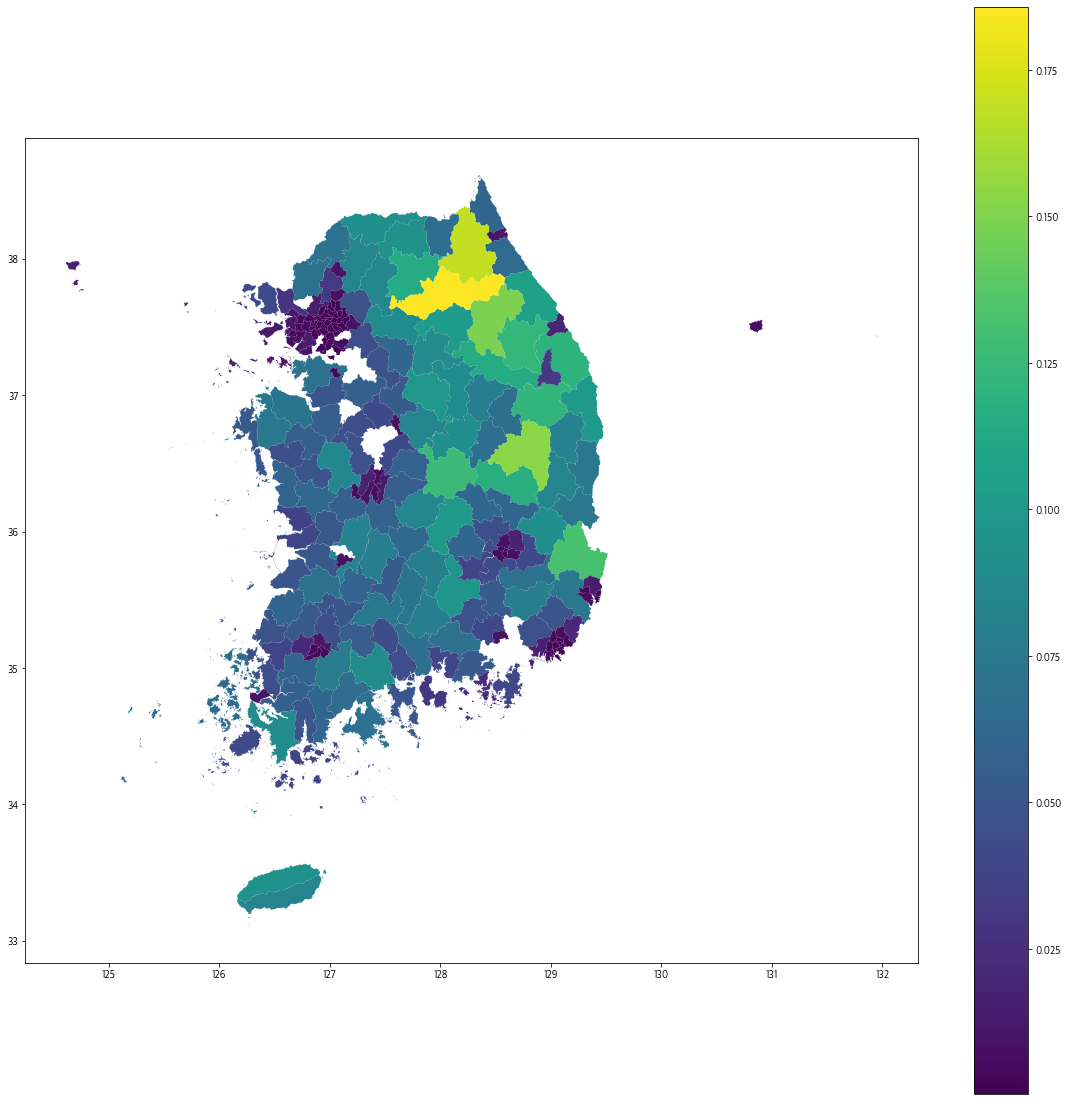

In [7]:
# 지도 boundary, centroid plot
fig, ax = plt.subplots(figsize=(20,20))

# lon_lat_gg_1['boundary'] = lon_lat_gg_1.boundary
# for i in lon_lat_gg_1.index:
#     lon_lat_gg_1['centroid'].plot(ax=ax,color='red')
#     lon_lat_gg_1['boundary'].plot(ax=ax,color='black')
    
lon_lat_gg_1['area'] = lon_lat_gg_1.area
lon_lat_gg_1.plot('area', legend=True, ax=ax)

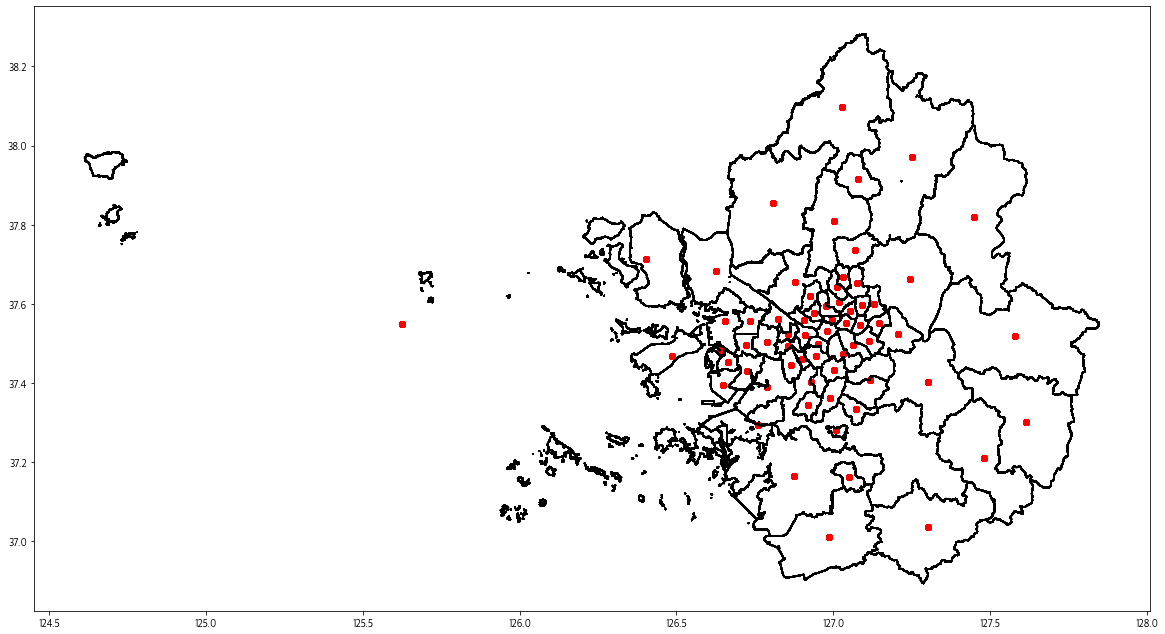

In [5]:
# 수도권 지도 boundary, centroid plot
fig, ax = plt.subplots(figsize=(20,20))

# lon_lat_gg_1['geometry'].plot(ax=ax)
lon_lat_gg_1['boundary'] = lon_lat_gg_1.boundary
for i in lon_lat_gg_1.index:
    lon_lat_gg_1['centroid'].plot(ax=ax,color='red')
    lon_lat_gg_1['boundary'].plot(ax=ax,color='black')

수도권 총  229 개 지역


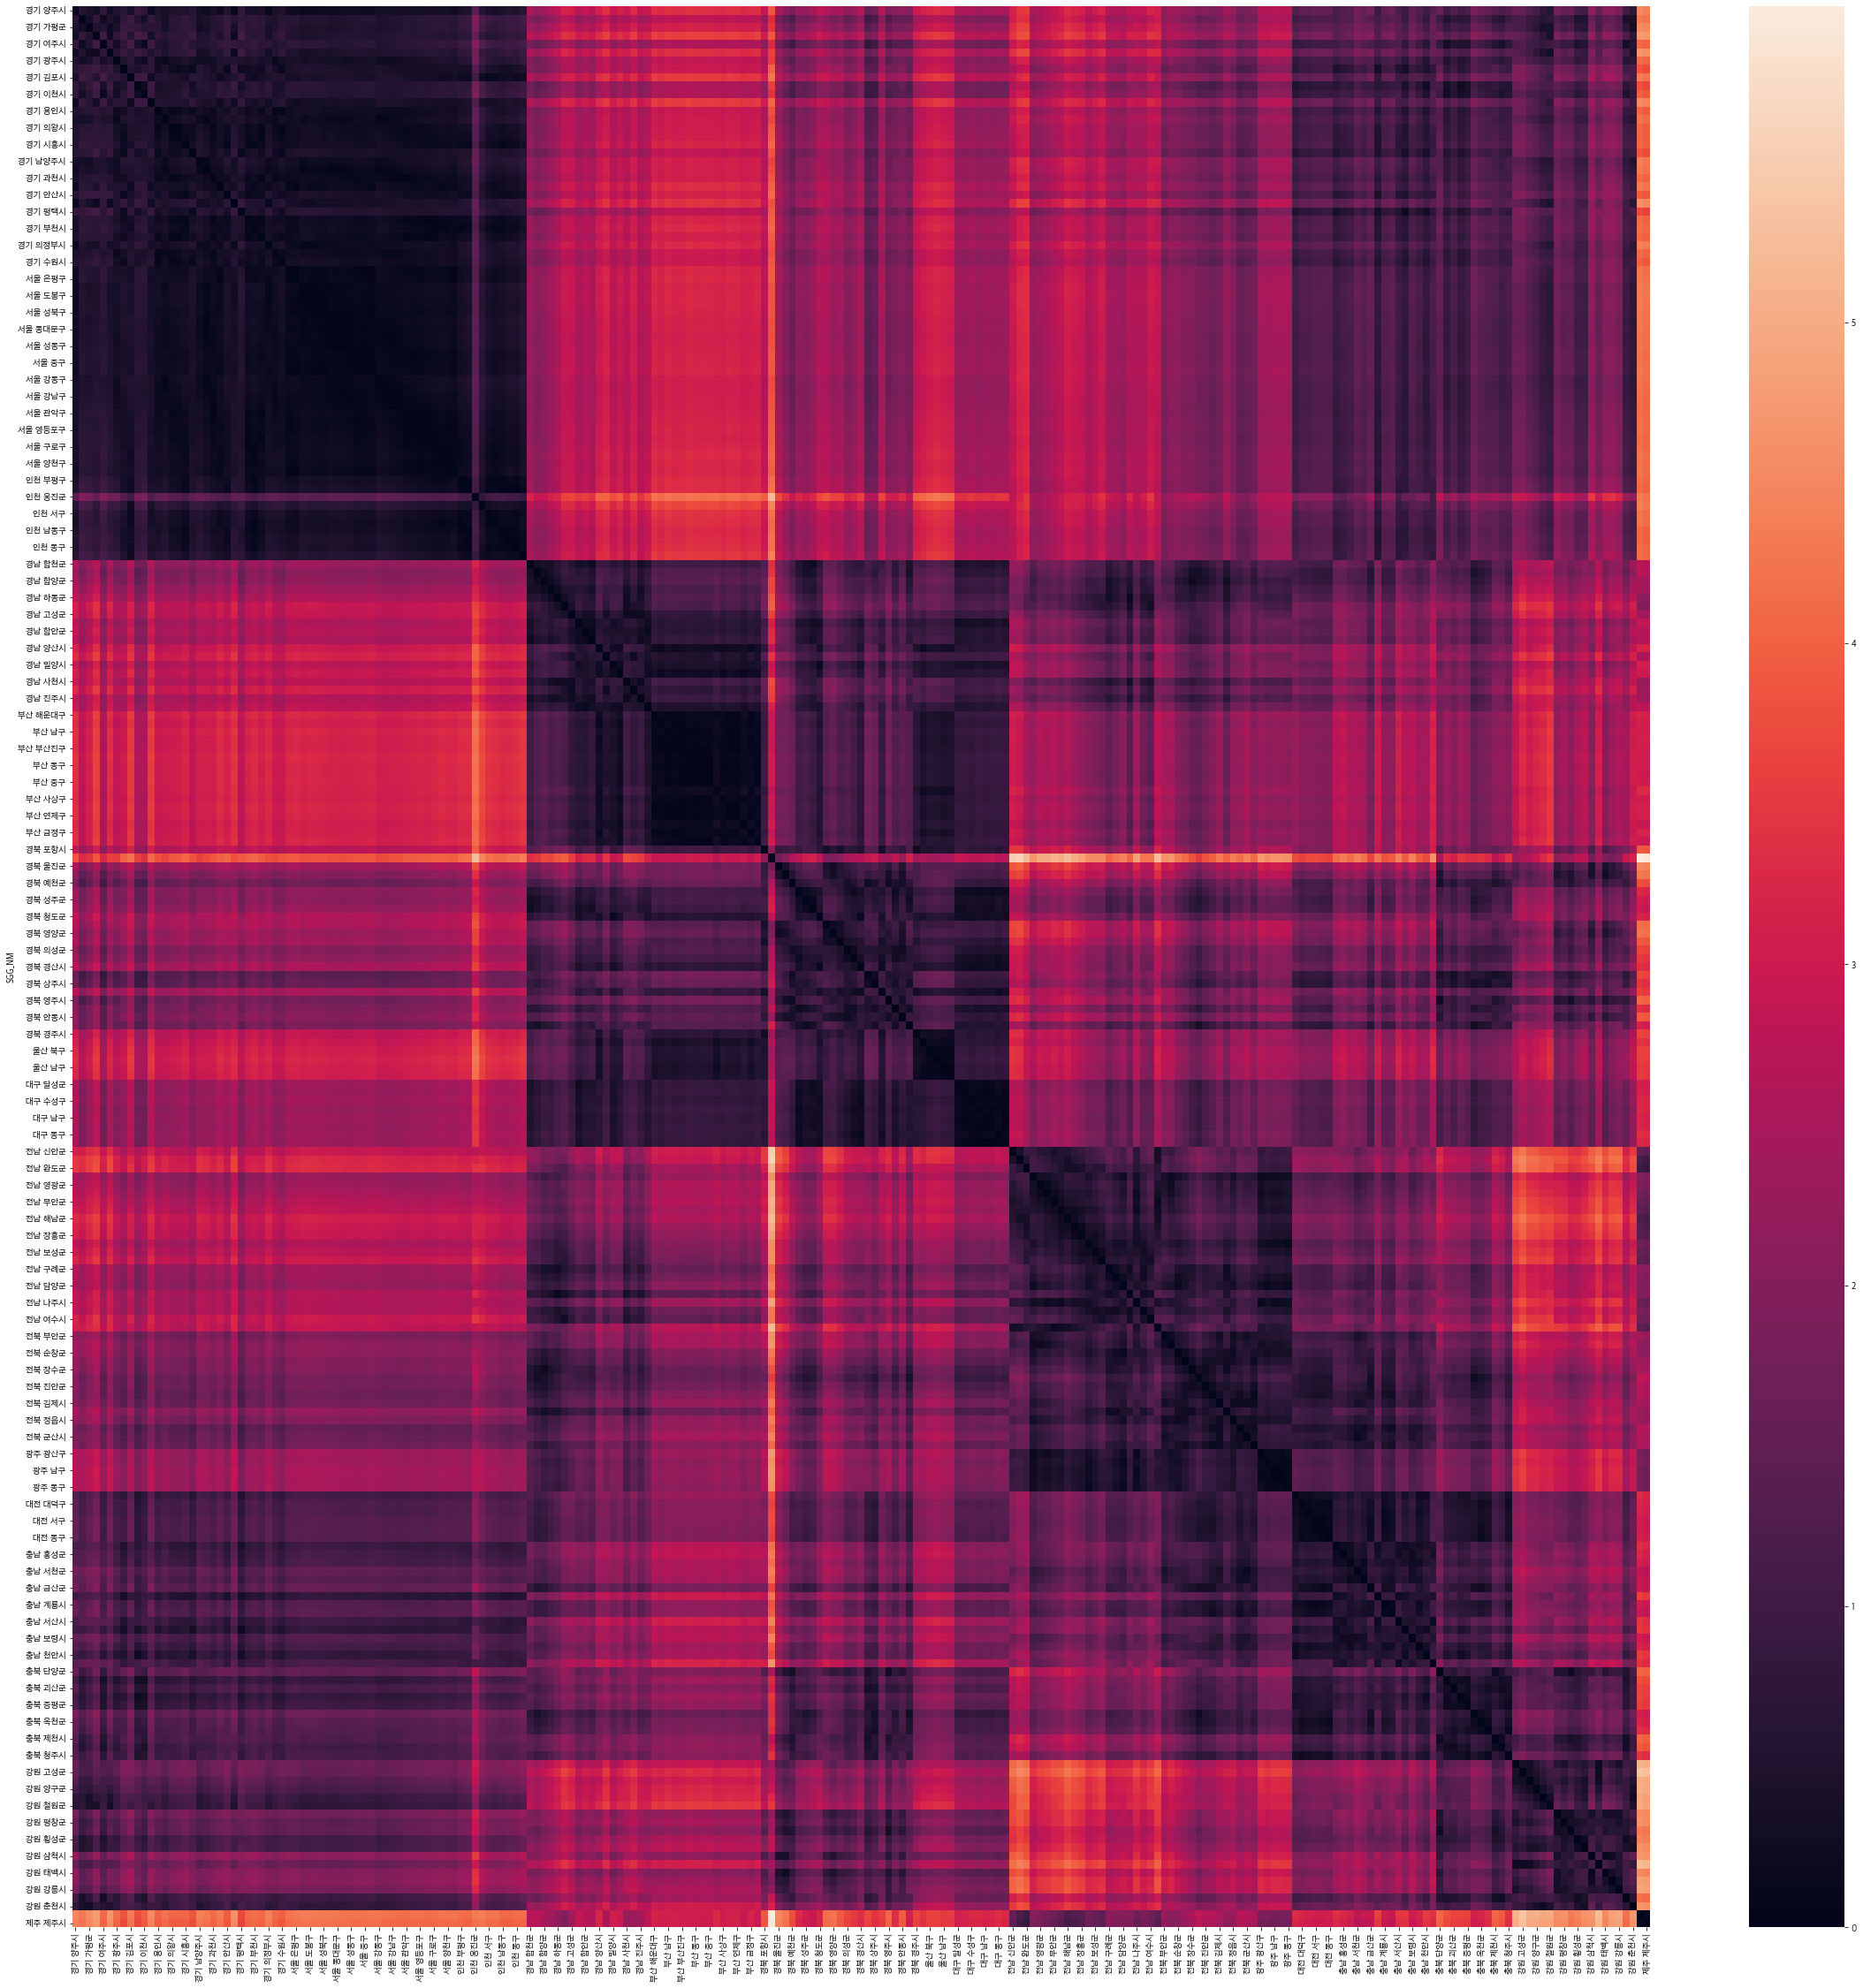

In [5]:
diff_df = pd.DataFrame({})
lon_lat_gg_1 = lon_lat_gg_1.set_index('SGG_NM')
for region in lon_lat_gg_1.index:
    # print(region)
    diff_df[region] = lon_lat_gg_1['centroid'].distance(lon_lat_gg_1['centroid'].loc[region]) # 유클리드 거리 계산

fig, ax = plt.subplots(figsize=(40,40))
ax = sns.heatmap(diff_df)
print('수도권 총 ', len(diff_df), '개 지역')

In [48]:
diff_df.to_csv('Data/distances_kr_city_adj_mx.csv', encoding='cp949')

In [24]:
df = pd.read_csv(f'Data/KCDC_data/Processing_Results/smoothing_1_city_mean.csv', index_col=0, encoding='cp949')
df = df.iloc[:340]
df = df.diff().dropna()

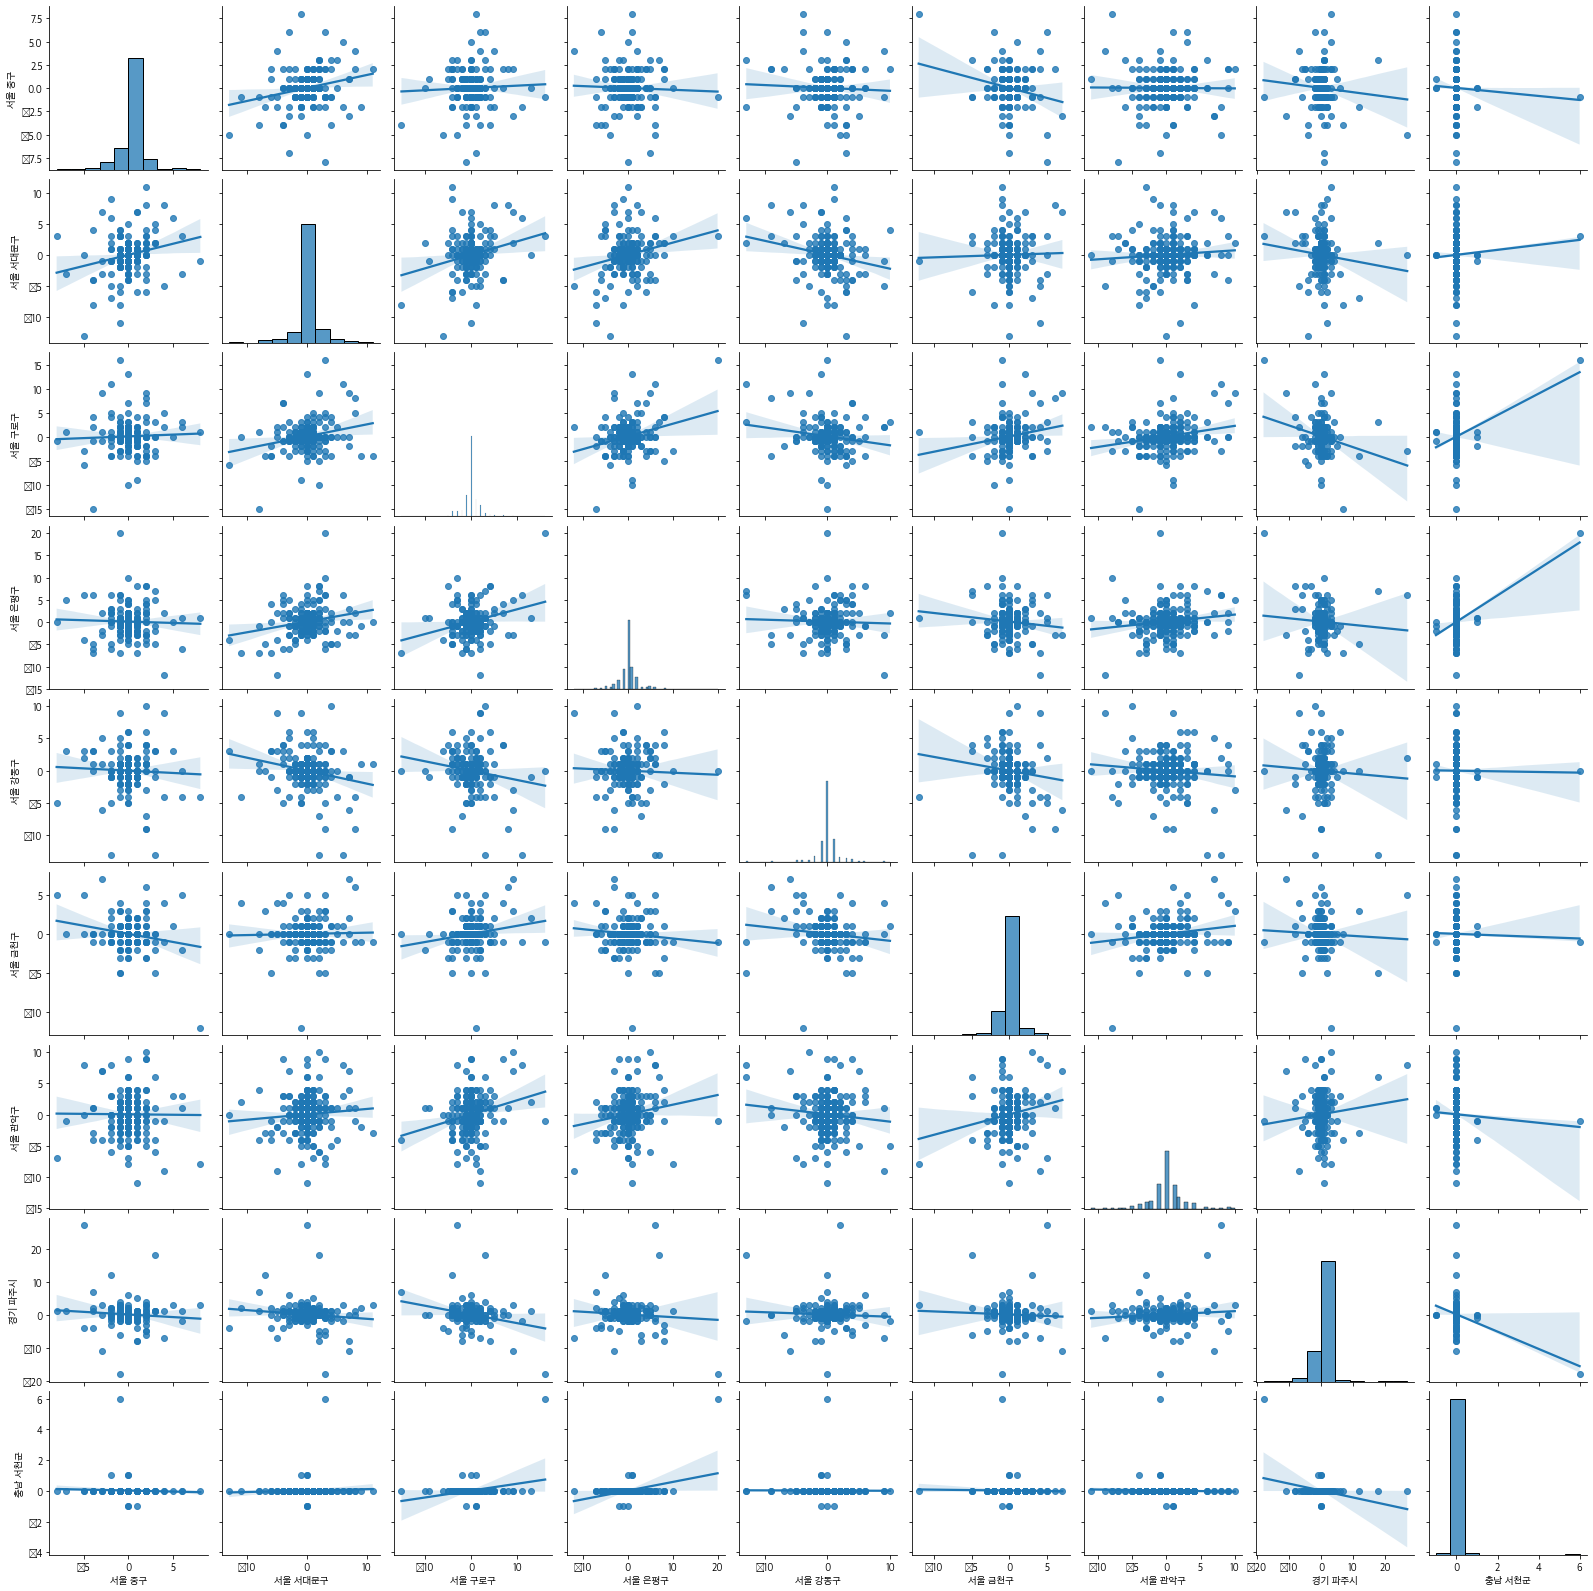

In [38]:
# PAIR PLOT
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import random

# Basic correlogram
# for i in range(50):
rand_list = random.sample([i for i in range(df.shape[1])], 5)
rand_list = [15, 17, 20, 21, 22, 23, 24, 45, 200]
p = sns.pairplot(data = df.iloc[:,rand_list], kind='reg')
# p = sns.pairplot(data = df.iloc[:,10:25], kind='reg')
plt.show()

# 1차 차분에 대한 비정상성 테스트

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import warnings
import random
warnings.filterwarnings('ignore')

def matplotlib_plot_font():
  # plot에서 한글 폰트 깨지는 현상 해결!
  from matplotlib import font_manager, rc
  font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
  font = font_manager.FontProperties(fname=font_path).get_name()
  rc('font', family = font)
  
matplotlib_plot_font()

In [2]:
df1 = pd.read_csv(f'Data/KCDC_data/Processing_Results/smoothing_1_city_mean.csv', index_col=0, encoding='cp949')
df2 = pd.read_csv(f'Data/KCDC_data/Processing_Results/smoothing_3_city_mean.csv', index_col=0, encoding='cp949')
df3 = pd.read_csv(f'Data/KCDC_data/Processing_Results/smoothing_5_city_mean.csv', index_col=0, encoding='cp949')

print(df1.shape, df2.shape, df3.shape)

(940, 229) (938, 229) (936, 229)


In [21]:
df2 = pd.read_csv(f'Data/KCDC_data/Processing_Results/smoothing_1_city_mean.csv', index_col=0, encoding='cp949')
df = df2.iloc[:340]

df_log = np.log(df2) # log변환
scaler = StandardScaler()
df_log.replace([np.inf, -np.inf], 0, inplace=True)
df_log_scale = scaler.fit_transform(df_log)

Nam-gu,Gwangju 
 ADF : -2.5120, p-val : 0.1126, # of lags : 20
Haeundae-gu,Busan 
 ADF : -1.6705, p-val : 0.4464, # of lags : 20


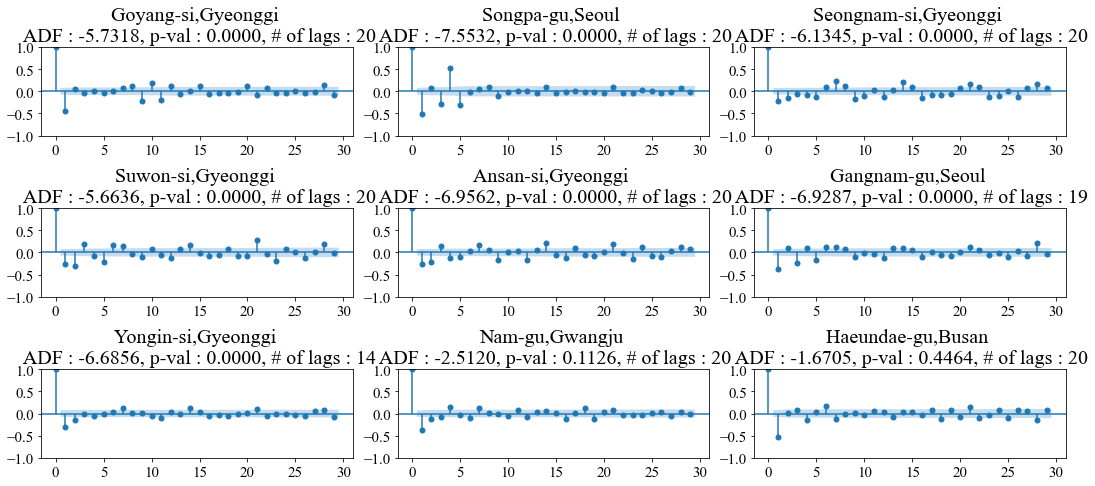

In [7]:
# 이거 정리해둬야함.
from matplotlib import font_manager, rc
# sys.path
font_path = '/opt/anaconda3/envs/cluster_venv/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/Times New Roman Font.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
####################

df2 = pd.read_csv(f'Data/KCDC_data/Processing_Results/smoothing_1_city_mean.csv', index_col=0, encoding='cp949')
df = df2.iloc[:707]

df_log = np.log(df2) # log변환
df = df.diff().dropna() # 1차 차분
df_log = df_log.diff().dropna() # 로그 1차 차분
df_diff_2 = df.diff().dropna() # 2차 차분

CityKorEng = pd.read_csv('Data/CityKorEng.csv', index_col=0)
CityKorEng['fullname'] = CityKorEng['name'] + '-' + CityKorEng['city'] + ',' + CityKorEng['state']
name_dict = dict(CityKorEng['fullname'])

plt.figure(figsize=(15,20))
rand_idx = []
select_num = 9
for _ in range(select_num):
    rand_idx.append(random.randint(0, 229))
ct = 0

#  (, 10463.0),
#  (, 10365.0),
#  (, 9692.0),
#  (, 9306.0),
#  (, 9244.0),
#  (, 9170.0),
#  ('경기 부천시', 8960.0),
#  ('서울 관악구', 8439.0),
 
rand_idx = ['경기 고양시','서울 송파구','경기 성남시','경기 수원시','경기 안산시','서울 강남구','경기 용인시','광주 남구','부산 해운대구']
 
# for i, region in enumerate(df.columns):
# for i, region in enumerate(df.columns[rand_idx]):
for i, region in enumerate(rand_idx):
    # 1차 차분
    ct = ct+1
    ax = plt.subplot(select_num, 3, ct)
    result = adfuller(df.loc[:,region])
    plot_acf(df.loc[:,region], ax=ax)
    title_ = '{} \n ADF : {:.4f}, p-val : {:.4f}, # of lags : {}'
    title_ = title_.format(name_dict[region], result[0], result[1], result[2])
    if result[1] > 0.05:
        print(title_)
    plt.title(title_, fontsize=20)
    # print(title_)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    # log 차분
    # ct = ct+1
    # ax = plt.subplot(select_num, 3, ct)
    # result_log = adfuller(df_log.iloc[:,i])
    # plot_acf(df_log.iloc[:,i], ax=ax)
    # title_ = '{}_log \n ADF : {:.4f}, p-val : {:.4f}, # of lags : {} \n crit_1% : {:.4f}, crit_5% : {:.4f}'
    # title_log = title_.format(region, result_log[0], result_log[1], result_log[2], result_log[4]['1%'], result_log[4]['5%'])    
    # if result_log[1] > 0.05:
    #     print(title_log)
    # plt.title(title_log)
    
    # 2차 차분
    # ct = ct+1
    # ax = plt.subplot(select_num, 3, ct)
    # result_diff_2 = adfuller(df_diff_2.iloc[:,i])
    # plot_acf(df_diff_2.iloc[:,i], ax=ax)
    # title_ = '{}_diff_2 \n ADF : {:.4f}, p-val : {:.4f}, # of lags : {} \n crit_1% : {:.4f}, crit_5% : {:.4f}'
    # title_diff_2 = title_.format(region, result_diff_2[0], result_diff_2[1], result_diff_2[2], result_diff_2[4]['1%'], result_diff_2[4]['5%'])    
    # if result_diff_2[1] > 0.05:
    #     print(title_diff_2)
    # plt.title(title_diff_2)
    
    plt.tight_layout()
plt.savefig('pdf_image/fig2.pdf', bbox_inches='tight')
    # plt.savefig(f'/Users/jeonjunhwi/문서/Projects/Master_GNN/Data/KCDC_data/acf_plot/{region}.png')
    # plt.close()

# Plot Korea Region Metric

결과 다시 낸 다음에, 경로 수정 필요 \
11/1일 코드 재정비후 경로 수정 안함

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# 한국 geodataframe에서 색으로 표시하기 위해 예외처리로 제외된 remove_list를 딕셔너리로 저장
enc_list = ['경기 성남시', '경기 안산시', '경기 수원시', '경기 안양시', '경기 고양시', '경기 용인시', '경남 창원시', '경북 포항시', '충남 천안시', '세종 세종시', '전북 전주시', '충북 청주시']
region_dict = {}

for i, region in enumerate(remove_list):
    if i<3:
        region_dict[region] = enc_list[0]
    elif i<5:
        region_dict[region] = enc_list[1]
    elif i<9:
        region_dict[region] = enc_list[2]
    elif i<11:
        region_dict[region] = enc_list[3]
    elif i<14:
        region_dict[region] = enc_list[4]
    elif i<17:
        region_dict[region] = enc_list[5]
    elif i<24:
        region_dict[region] = enc_list[6]
    elif i<26:
        region_dict[region] = enc_list[7]
    elif i<29:
        region_dict[region] = enc_list[8]
    elif i<31:
        region_dict[region] = enc_list[8]
    elif i<33:
        region_dict[region] = enc_list[9]
    elif i<37:
        region_dict[region] = enc_list[10]
        

# 위와 동일하게 전처리를 해줌
gdf_tmp['SGG_NM'] = gdf_tmp['SGG_NM'].str.replace('서울시', '')
gdf_tmp = gdf_tmp.set_index('SGG_NM')

# boundary plot

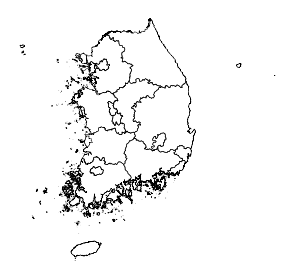

In [9]:
test = glob('**/**/*CTPRVN*/**.shp')
gg = gpd.read_file(test[0], encoding='cp949')

fig, ax = plt.subplots()
gg['boundary'] = gg.boundary
gg['boundary'].plot(ax = ax, color='black', linewidth=0.5)
ax.set_axis_off()
plt.tight_layout()

In [16]:
gdf_tmp['centroid2'] = gdf_tmp.centroid
# line을 테스트하기위해 centroid를 한칸씩 아래로
gdf_tmp.iloc[1:,4] = gdf_tmp.iloc[:-1,3]
gdf_tmp.iloc[0,4] = gdf_tmp.iloc[-1,3]
# line geometry column을 만들어줌
gdf_tmp['line_geometry'] = gdf_tmp.geometry

In [18]:
from shapely.geometry import Point, LineString, shape

for i, idx in enumerate(gdf_tmp.index):
    p1 = gdf_tmp.iloc[i, 3] # centroid
    p2 = gdf_tmp.iloc[i, 4] # centroid2
    gdf_tmp.iloc[i, 5] = LineString([p1, p2]) # Line_geometry

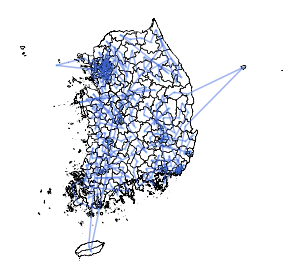

In [32]:
fig, ax = plt.subplots()
gdf_tmp['boundary'] = gdf_tmp.boundary
gdf_tmp['boundary'].plot(ax = ax, color='black', linewidth=0.5)
gdf_tmp['centroid'].plot(ax = ax, color='skyblue', markersize=1)
gdf_tmp['line_geometry'].plot(ax = ax, color='royalblue', alpha=0.5)
ax.set_axis_off()
plt.tight_layout()

# centroid 합쳐야함 + 어느 지역에서 어느 지역으로 가는지 adjacency matrix가 있어야 함.
# 기준좌표1, 좌표1, 좌표2, ...
# 좌표1, 기준좌표2, ..
# 좌표2, ...
# 이렇게 한 다음에 매핑시켜서 line을 그려야 함.

plt.savefig('pdf_image/Network_test.pdf', bbox_inches='tight')


# boundary plot end

<AxesSubplot:>

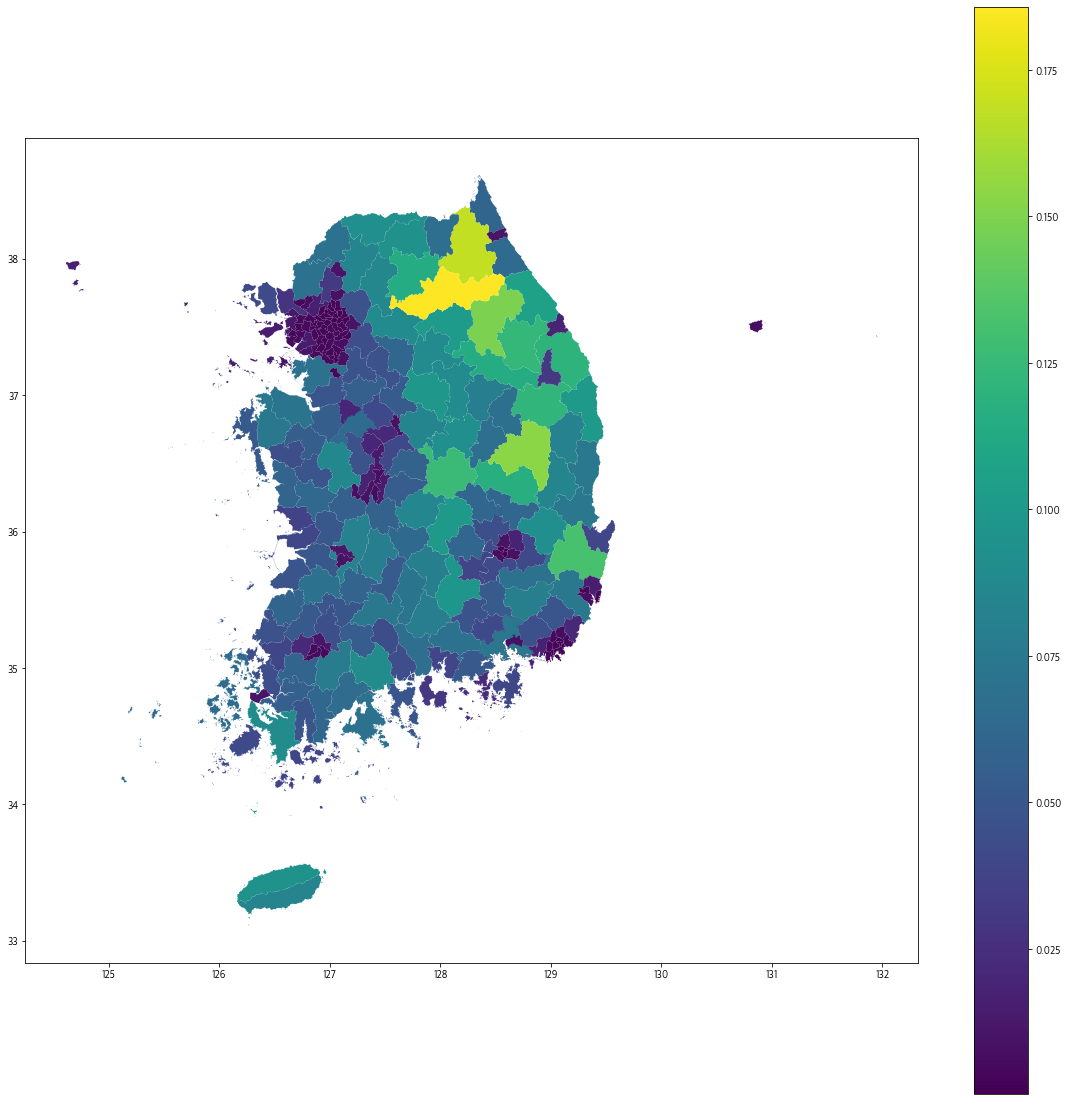

In [8]:
# 지도 boundary, centroid plot
fig, ax = plt.subplots(figsize=(20,20))
    
gdf_tmp['area'] = gdf_tmp.area
gdf_tmp.plot('area', legend=True, ax=ax)

# Diameter plot

In [ ]:
ㅎ

corr 0.2
corr 0.4
corr 0.6
dist_01 0.6
dist_01 0.7
dist_01 0.8
dist_02 1
dist_02 2


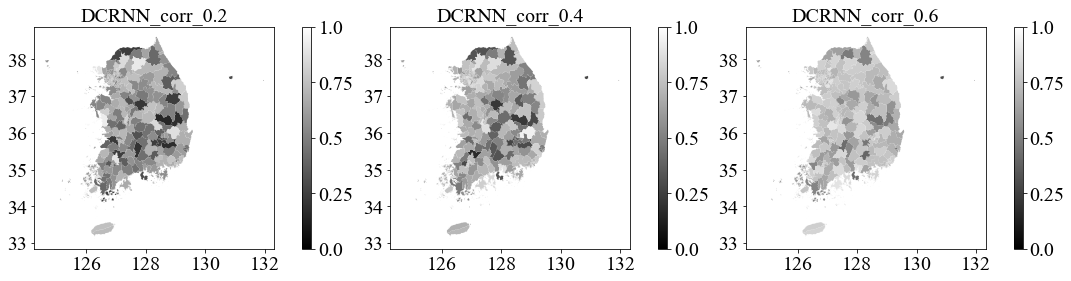

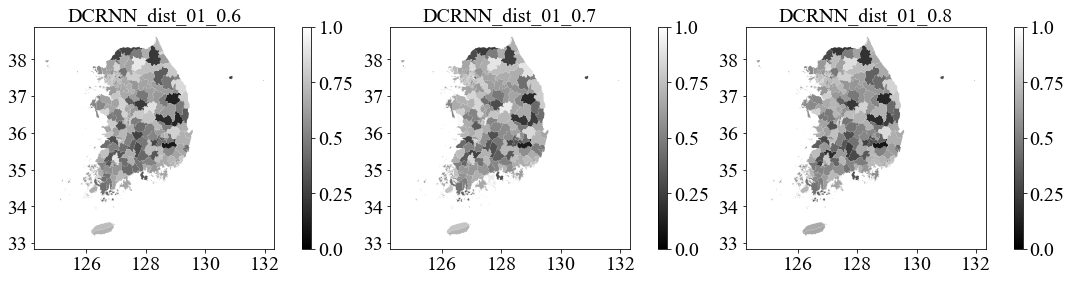

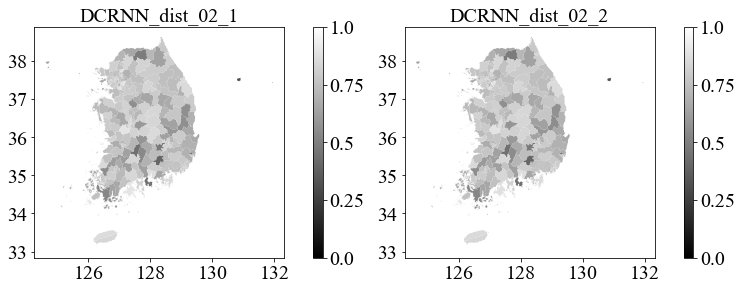

In [16]:
# 이거 정리해둬야함.
import matplotlib as mat
import matplotlib.font_manager as fm
import matplotlib as mpl
from matplotlib import font_manager, rc
import sys
# sys.path
font_path = '/opt/anaconda3/envs/cluster_venv/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/Times New Roman Font.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

duration = 707
hop = 2
BASEPATH = f'final_result/region_metric'

folder = f'1120_{duration}_64_true_mul_{hop}hop'
gt_path = glob(f'Result/{folder}/Pred/*/*/ground_truth.csv')
region_gt = pd.read_csv(gt_path[0], index_col=0, encoding='cp949')

MODEL = 'DCRNN'
region_type = 'city'
# data_type = 'metric' # metric, diameter, degree
name = 'smoothing1_cross_corr'
network_dict = dict({
                     'corr' : [0.2, 0.4, 0.6],
                     'dist_01' : [0.6, 0.7, 0.8],
                     'dist_02' : [1, 2]})

# ct = 0
for name2 in [0]:#['1hop', '1hop_int', '2hop', '2hop_int']:
    for graph_type in network_dict.keys():
        ct = 0
        plt.figure(figsize=(15,10))
        for norm in network_dict[graph_type]:
            # Network Diameter
            metric = pd.read_csv(f'{BASEPATH}/{MODEL}_region_RMSE_{duration}_{hop}hop.csv', encoding='cp949', index_col=0) # degree : region, metric : 0, diameter : SGG_NM            

            # 20일동안 mean rmse로 나눠서 비율 확인
            relative_metric = pd.DataFrame({f'{graph_type}_{norm}' : (np.abs(region_gt.iloc[:20]) / metric[f'{graph_type}_{norm}']).mean().values}, index=metric.index)
            print(graph_type, norm)
            col_name = f'{graph_type}_{norm}'
            
            # 딕셔너리로 저장된, 제외된 지역에 enc_list와 같은 metric 할당
            for idx_region in gdf_tmp.index:
                if idx_region in region_dict.keys():
                    # gdf_tmp.loc[idx_region, col_name] = metric.loc[region_dict[idx_region], col_name]
                    gdf_tmp.loc[idx_region, col_name] = relative_metric.loc[region_dict[idx_region], col_name]
                else:
                    # gdf_tmp.loc[idx_region, col_name] = metric.loc[idx_region, col_name]    
                    gdf_tmp.loc[idx_region, col_name] = relative_metric.loc[idx_region, col_name]           
            maxv, minv = max(gdf_tmp[col_name]), min(gdf_tmp[col_name])
            
            # fig, ax = plt.subplots(figsize=(15,10), nrows=1, ncols=2)
            ct += 1
            ax=plt.subplot(1, 3, ct)
            plt.title(f"{MODEL}_{graph_type}_{norm}", fontsize=20)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)

            # ax를 나눠서 하나의 ax를 컬러바로 정의함.
            divider = make_axes_locatable(ax)
            # create `cax` for the colorbar
            cax = divider.append_axes("right", size="3%", pad=0)
            # plot the geodataframe specifying the axes `ax` and `cax`
            # cmap : magma, binary, gist_gray
            gdf_tmp.plot(column=col_name, cmap='gist_gray', legend=True,
                        vmin=0, vmax=1, ax=ax, cax=cax)
                        # vmin=0, vmax=30, ax=ax, cax=cax)
            # ax.set_axis_off()
            cax.set_yticks(np.linspace(0, 1, 5))
            cax.set_yticklabels(cax.get_yticks(), fontsize=20)
            # if ct == 1:
                # cax.set_axis_off()
            plt.tight_layout()

경계선 플롯

In [ ]:
# 이거 정리해둬야함.
import matplotlib as mat
import matplotlib.font_manager as fm
import matplotlib as mpl
from matplotlib import font_manager, rc
import sys
# sys.path
font_path = '/opt/anaconda3/envs/cluster_venv/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/Times New Roman Font.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

duration = 707
hop = 2
BASEPATH = f'final_result/region_metric'

folder = f'1120_{duration}_64_true_mul_{hop}hop'
gt_path = glob(f'Result/{folder}/Pred/*/*/ground_truth.csv')
region_gt = pd.read_csv(gt_path[0], index_col=0, encoding='cp949')

MODEL = 'DCRNN'
region_type = 'city'
# data_type = 'metric' # metric, diameter, degree
name = 'smoothing1_cross_corr'
network_dict = dict({
                     'corr' : [0.2, 0.4, 0.6],
                     'dist_01' : [0.6, 0.7, 0.8],
                     'dist_02' : [1, 2]})

# ct = 0
for name2 in [0]:#['1hop', '1hop_int', '2hop', '2hop_int']:
    for graph_type in network_dict.keys():
        ct = 0
        plt.figure(figsize=(15,10))
        for norm in network_dict[graph_type]:
            # Network Diameter
            metric = pd.read_csv(f'{BASEPATH}/{MODEL}_region_RMSE_{duration}_{hop}hop.csv', encoding='cp949', index_col=0) # degree : region, metric : 0, diameter : SGG_NM            

            # 20일동안 mean rmse로 나눠서 비율 확인
            relative_metric = pd.DataFrame({f'{graph_type}_{norm}' : (np.abs(region_gt.iloc[:20]) / metric[f'{graph_type}_{norm}']).mean().values}, index=metric.index)
            print(graph_type, norm)
            col_name = f'{graph_type}_{norm}'
            
            # 딕셔너리로 저장된, 제외된 지역에 enc_list와 같은 metric 할당
            for idx_region in gdf_tmp.index:
                if idx_region in region_dict.keys():
                    # gdf_tmp.loc[idx_region, col_name] = metric.loc[region_dict[idx_region], col_name]
                    gdf_tmp.loc[idx_region, col_name] = relative_metric.loc[region_dict[idx_region], col_name]
                else:
                    # gdf_tmp.loc[idx_region, col_name] = metric.loc[idx_region, col_name]    
                    gdf_tmp.loc[idx_region, col_name] = relative_metric.loc[idx_region, col_name]           
            maxv, minv = max(gdf_tmp[col_name]), min(gdf_tmp[col_name])
            
            # fig, ax = plt.subplots(figsize=(15,10), nrows=1, ncols=2)
            ct += 1
            ax=plt.subplot(1, 3, ct)
            plt.title(f"{MODEL}_{graph_type}_{norm}", fontsize=20)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)

            # ax를 나눠서 하나의 ax를 컬러바로 정의함.
            divider = make_axes_locatable(ax)
            # create `cax` for the colorbar
            cax = divider.append_axes("right", size="3%", pad=0)
            # plot the geodataframe specifying the axes `ax` and `cax`
            # cmap : magma, binary, gist_gray
            gdf_tmp.plot(column=col_name, cmap='gist_gray', legend=True,
                        vmin=0, vmax=1, ax=ax, cax=cax)
                        # vmin=0, vmax=30, ax=ax, cax=cax)
            # ax.set_axis_off()
            cax.set_yticks(np.linspace(0, 1, 5))
            cax.set_yticklabels(cax.get_yticks(), fontsize=20)
            # if ct == 1:
                # cax.set_axis_off()
            plt.tight_layout()

흰색 부분이 어디지

In [15]:
gdf_tmp.plot(column=col_name, legend=True,
            vmin=0, vmax=maxv, ax=ax, cax=cax)

<AxesSubplot:title={'center':'dist_01_0.8'}>

<Figure size 432x288 with 0 Axes>

dist_01 0.6
dist_01 0.7
dist_01 0.8


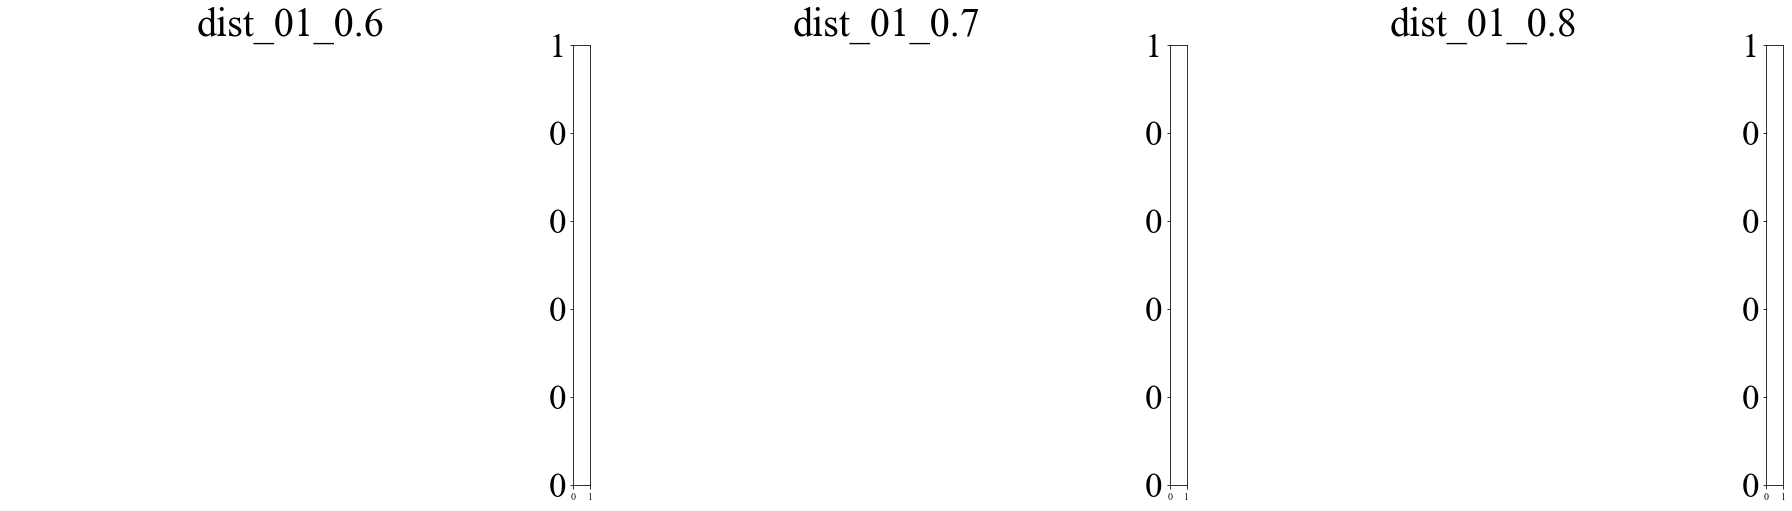

In [14]:
# 이거 정리해둬야함.
import matplotlib as mat
import matplotlib.font_manager as fm
import matplotlib as mpl
from matplotlib import font_manager, rc
import sys
import numpy as np
# sys.path
font_path = '/opt/anaconda3/envs/cluster_venv/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/Times New Roman Font.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

duration = 707
hop = 1
BASEPATH = glob(f'Result/df{duration}_Network/Diameter/*')[0]

MODEL = 'GCN'
region_type = 'city'
# data_type = 'metric' # metric, diameter, degree
name = 'smoothing1_cross_corr'
network_dict = dict({
                    #  'corr' : [0.2, 0.4, 0.6]})
                     'dist_01' : [0.6, 0.7, 0.8]})
                    #  'dist_02' : [1, 2]})

# ct = 0
for name2 in [0]:#['1hop', '1hop_int', '2hop', '2hop_int']:
    ct = 0
    plt.figure(figsize=(25,20))
    for graph_type in network_dict.keys():

        for norm in network_dict[graph_type]:
            # Network Diameter
            
            degree = pd.read_csv(f'{BASEPATH}/GCN_{graph_type}_{norm}_1st/{graph_type}_city_{norm}_degree.csv', encoding='cp949', index_col='region') # degree : region, metric : 0, diameter : SGG_NM            
            del degree['Unnamed: 0']
            
            # 20일동안 mean rmse로 나눠서 비율 확인
            # relative_metric = pd.DataFrame({f'{graph_type}_{norm}' : np.abs(region_gt.iloc[:20] / metric[f'{graph_type}_{norm}']).mean().values}, index=metric.index)
            print(graph_type, norm)
            col_name = 'degree'
            
            # 딕셔너리로 저장된, 제외된 지역에 enc_list와 같은 metric 할당
            for idx_region in gdf_tmp.index:
                if idx_region in region_dict.keys():
                    # gdf_tmp.loc[idx_region, col_name] = metric.loc[region_dict[idx_region], col_name]
                    gdf_tmp.loc[idx_region, col_name] = degree.loc[region_dict[idx_region], col_name]
                else:
                    # gdf_tmp.loc[idx_region, col_name] = metric.loc[idx_region, col_name]    
                    gdf_tmp.loc[idx_region, col_name] = degree.loc[idx_region, col_name]           
            # maxv, minv = max(gdf_tmp[col_name]), min(gdf_tmp[col_name])
            
            # fig, ax = plt.subplots(figsize=(15,10), nrows=1, ncols=2)
            ct += 1
            ax=plt.subplot(3, 3, ct)
            plt.title(f"{graph_type}_{norm}", fontsize=40)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)

            # ax를 나눠서 하나의 ax를 컬러바로 정의함.
            divider = make_axes_locatable(ax)
            # create `cax` for the colorbar
            cax = divider.append_axes("right", size="3%", pad=0)
            # plot the geodataframe specifying the axes `ax` and `cax`
            # cmap : magma, binary, gist_gray
            # if graph_type == 'dist_02':
            #     maxv=6
            #     gdf_tmp.plot(column=col_name, cmap='gist_gray', legend=True,
            #                 # vmin=minv, vmax=maxv, ax=ax, cax=cax)
            #                 vmin=0, vmax=maxv, ax=ax, cax=cax)
            #     cax.set_yticks(np.linspace(0, 6, 7))
            # elif graph_type == 'dist_01':
            #     maxv=80
            #     gdf_tmp.plot(column=col_name, cmap='gist_gray', legend=True,
            #                 # vmin=minv, vmax=maxv, ax=ax, cax=cax)
            #                 vmin=0, vmax=maxv, ax=ax, cax=cax)
            #     cax.set_yticks(np.linspace(0, 80, 5))
            # else:
            #     maxv = max(gdf_tmp[col_name])
            #     gdf_tmp.plot(column=col_name, cmap='gist_gray', legend=True,
            #                 # vmin=minv, vmax=maxv, ax=ax, cax=cax)
            #                 vmin=0, vmax=maxv, ax=ax, cax=cax)
            #     cax.set_yticks(np.linspace(0, maxv+5, 5))
            

            ax.set_axis_off()
            cax.set_yticklabels(cax.get_yticks().astype(int), fontsize=35)
            # if ct == 1:
                # cax.set_axis_off()
plt.tight_layout()
# plt.savefig(f'pdf_image/Korea_map_{duration}_{graph_type}.pdf', bbox_inches='tight')

degree

In [256]:
import numpy as np
import pandas as pd
a = pd.DataFrame({'a' : [1,2,3],
                  'b' : [1, np.nan, np.nan]})

<AxesSubplot:>

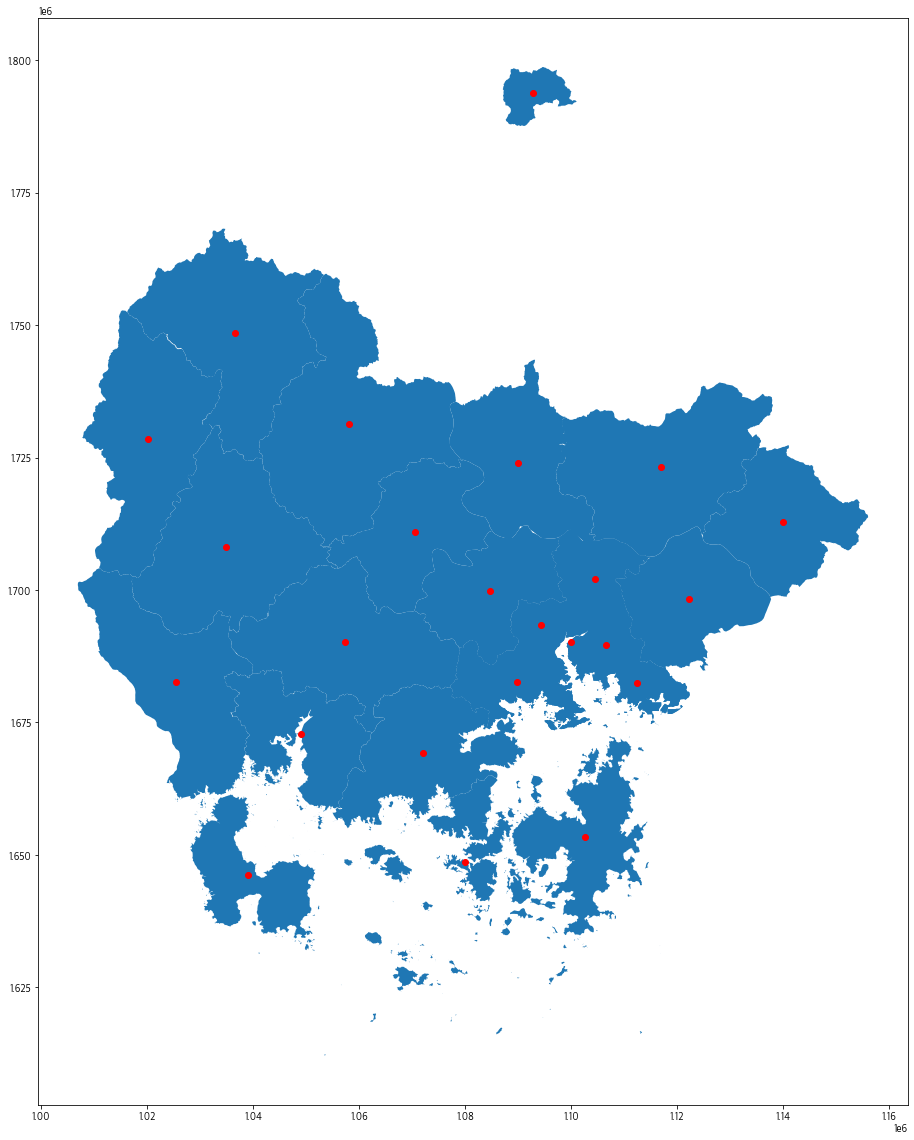

In [73]:
gg = gpd.read_file('LARD_ADM_SECT_SGG_경남/LARD_ADM_SECT_SGG_48.shp', encoding='cp949')
gg['centroid'] = gg.centroid

fig, ax = plt.subplots(figsize=(20,20))
gg['geometry'].plot(ax = ax)
gg['centroid'].plot(ax = ax, color = 'red')

In [32]:
# 좌표계(Coordinate Refference System) 변경 -> 위도, 경도 기준으로 바뀜.
lon_lat_gg = gg.to_crs(4326)
lon_lat_gg['longitude'] = lon_lat_gg.centroid.x  
lon_lat_gg['latitude'] = lon_lat_gg.centroid.y
lon_lat_gg['centroid2'] = lon_lat_gg.centroid

/var/folders/ds/r5c30pq90cvc_pl2xn1337r40000gn/T/ipykernel_7258/4023410774.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nc_counties['longitude'] = nc_counties.centroid.x
/var/folders/ds/r5c30pq90cvc_pl2xn1337r40000gn/T/ipykernel_7258/4023410774.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nc_counties['latitude'] = nc_counties.centroid.y
/var/folders/ds/r5c30pq90cvc_pl2xn1337r40000gn/T/ipykernel_7258/4023410774.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nc_counties['centroid2'] = nc_counties.centroid


## State Dist Adj Matrix

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import pandas as pd
df = pd.read_csv('/Users/jeonjunhwi/문서/Projects/Master_GNN/stgcn_wave/data/sensor_graph/state_location.csv')
df = df.set_index('지역')


전국  17 개 시도


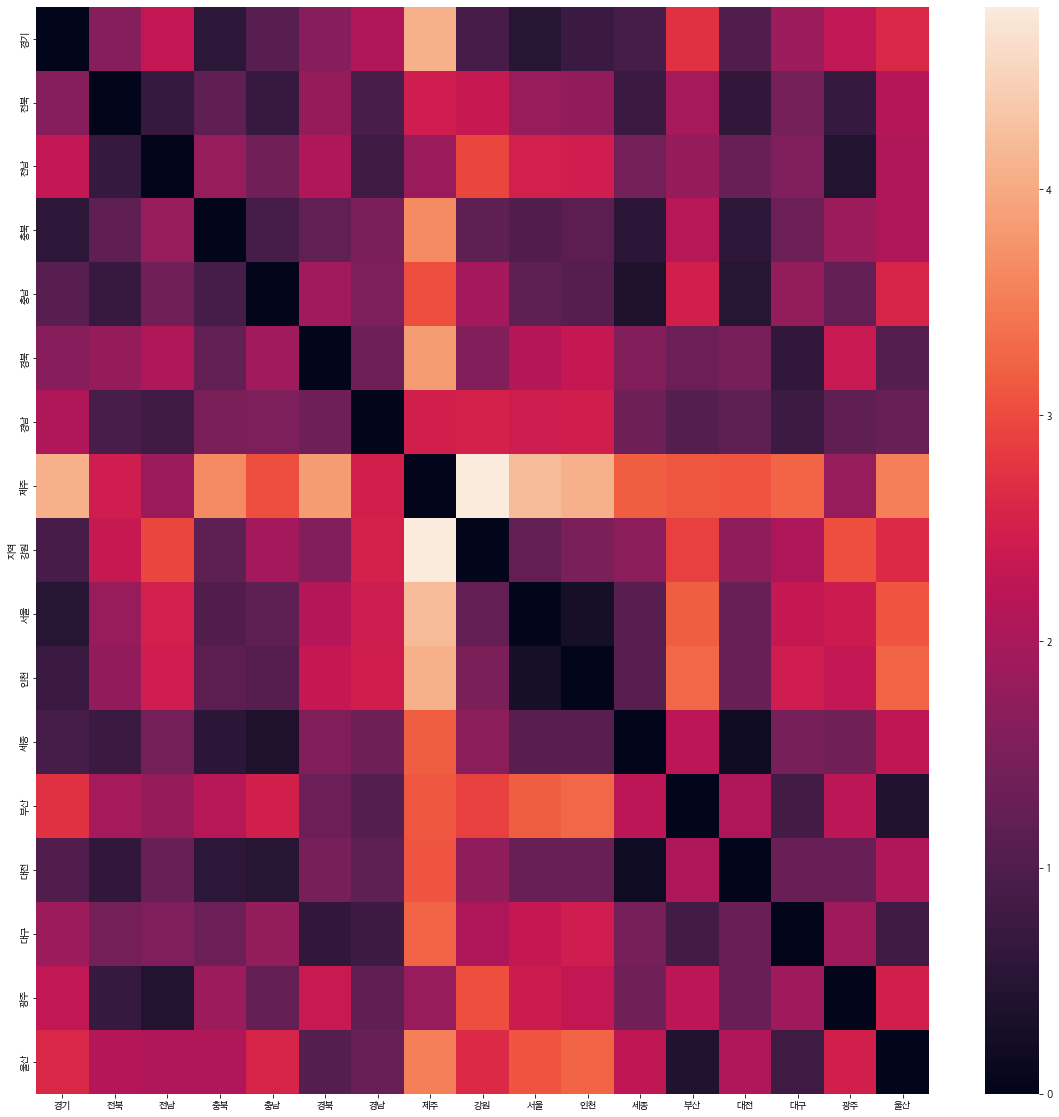

In [24]:
diff_df = pd.DataFrame({})
# 각 지역에 대한 유클리드 거리 계산
for idx, region in enumerate(df.index):
    diff_df[region] = np.sqrt(((df[['latitude', 'longitude']] - df[['latitude', 'longitude']].iloc[idx])**2).sum(axis=1))
    
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(diff_df)
print('전국 ', len(diff_df), '개 시도')
plt.show()

In [25]:
diff_df

,경기,전북,전남,충북,충남,경북,경남,제주,강원,서울,인천,세종,부산,대전,대구,광주,울산
지역,,,,,,,,,,,,,,,,,
경기,0.000000,1.627221,2.296710,0.574033,1.105496,1.647843,2.069440,4.081395,0.904068,0.504737,0.735461,0.895638,2.727145,1.011813,1.874306,2.278407,2.613995
전북,1.627221,0.000000,0.694508,1.196218,0.700433,1.797067,0.928919,2.459304,2.363690,1.821257,1.763727,0.732956,1.981324,0.630483,1.427620,0.678725,2.143597
전남,2.296710,0.694508,0.000000,1.813968,1.383959,2.080745,0.799294,1.848323,2.966274,2.515146,2.455290,1.413929,1.788097,1.285012,1.545902,0.445804,2.074883
충북,0.574033,1.196218,1.813968,0.000000,0.899518,1.203338,1.503918,3.643872,1.167495,1.009889,1.149396,0.550023,2.168742,0.572434,1.322438,1.873968,2.087436
충남,1.105496,0.700433,1.383959,0.899518,0.000000,1.929442,1.521231,3.037963,1.966878,1.170803,1.074986,0.374573,2.493666,0.488297,1.775446,1.238273,2.561379
경북,1.647843,1.797067,2.080745,1.203338,1.929442,0.000000,1.355586,3.845941,1.579238,2.147991,2.333966,1.563482,1.316881,1.446941,0.624920,2.370118,1.053371
경남,2.069440,0.928919,0.799294,1.503918,1.521231,1.355586,0.000000,2.490399,2.531009,2.426814,2.460585,1.344309,1.065706,1.166706,0.768518,1.194275,1.293762
제주,4.081395,2.459304,1.848323,3.643872,3.037963,3.845941,2.490399,0.000000,4.806437,4.207659,4.078468,3.186101,3.108381,3.088571,3.247159,1.806673,3.512125
강원,0.904068,2.363690,2.966274,1.167495,1.966878,1.579238,2.531009,4.806437,0.000000,1.232017,1.519954,1.681739,2.874570,1.737175,2.062017,3.041065,2.632008


In [27]:
diff_df.to_csv('/Users/jeonjunhwi/문서/Projects/Master_GNN/Code/data/distances_kr_state_adj_mx.csv', encoding='cp949')

In [15]:
plotdf = pd.read_csv('Data/lonlatorigdest.csv', index_col=0)

In [16]:
plotdf

,LongDest,LatDest,LongOrig,LatOrig,Edges
0,127.001164,37.808703,127.001164,37.808703,1.0
1,127.027106,38.096581,127.001164,37.808703,1.0
2,127.250407,37.969916,127.001164,37.808703,1.0
3,126.626455,37.681799,127.001164,37.808703,1.0
4,126.809477,37.855499,127.001164,37.808703,1.0
...,...,...,...,...,...
4720,127.729330,36.489954,127.729330,36.489954,1.0
4721,128.140932,37.059893,128.140932,37.059893,1.0
4722,127.895615,37.015164,128.140932,37.059893,1.0
4723,128.140932,37.059893,127.895615,37.015164,1.0


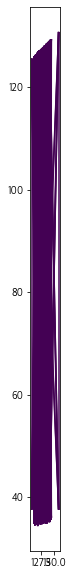

In [20]:
gdf_tmp.to_csv('lonlat.csv')
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

# this dataframe `points_df` contains from_point, to_point for creating `lineString`.
points_df = gpd.GeoDataFrame([[plotdf.index[i], Point(plotdf.loc[i,'LongOrig'], plotdf.loc[i,'LatOrig']),
                               Point(plotdf.loc[i,'LongDest'], plotdf.loc[i,'LongDest']), 1] for i in plotdf.index],
                             columns=['id', 'Origin', 'Destination', 'value'])

# add new column, `line` to the dataframe,
# this column contains `LineString` geometry.
points_df['line'] = points_df.apply(lambda x: LineString([x['Origin'], x['Destination']]), axis=1)

# assign geometry to `points_df` using the column that has `LineString` geometry
# take the result as `target_gdf`
# `target_gdf` is now capable of plotting with matplotlib 
target_gdf = gpd.GeoDataFrame(points_df, geometry=points_df['line'])

f, ax = plt.subplots(figsize=(10,10))
target_gdf.plot(ax=ax, column = 'value');
plt.show()